In [1]:
import numpy as np
import yroots as yr
import matplotlib.pyplot as plt
import warnings

In [3]:
# function to filter out roots outside of the interval (allows for nicer plots)
def rootfilter(roots,a,b,tol):
    roots = roots[np.all(roots >= a - tol,axis = 1)]
    roots = roots[np.all(roots <= b + tol,axis = 1)]
    return roots

# `test_roots01`

Percent Finished: 100%       
Total intervals checked was 196
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 1.0204 92.3469  0.      6.6327  0.    ]


<Figure size 3600x2400 with 0 Axes>

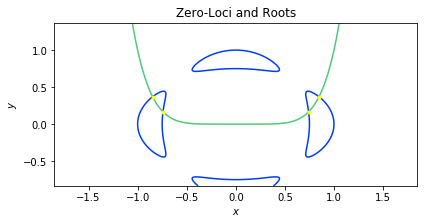

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[1.30017455e-06 2.28442000e-06 1.95222959e-06 1.87866918e-06]


In [4]:
###test_roots01
#01
f = lambda x,y: 144*(x**4+y**4)-225*(x**2+y**2) + 350*x**2*y**2+81
g = lambda x,y: y-x**6

r1 = np.loadtxt('chebfun_test_output/cftest1_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

Percent Finished: 100%         
Total intervals checked was 1351
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 1.7765 85.7883  8.0681  4.3671  0.    ]


<Figure size 3600x2400 with 0 Axes>

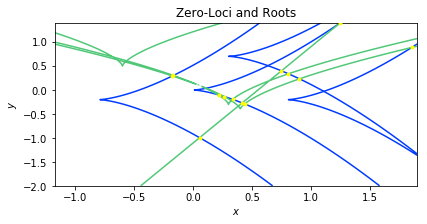

Number of roots: 13
Number found by yroots: 11


In [5]:
#02
f = lambda x,y: (y**2-x**3)*((y-0.7)**2-(x-0.3)**3)*((y+0.2)**2-(x+0.8)**3)*((y+0.2)**2-(x-0.8)**3)
g = lambda x,y: ((y+.4)**3-(x-.4)**2)*((y+.3)**3-(x-.3)**2)*((y-.5)**3-(x+.6)**2)*((y+0.3)**3-(2*x-0.8)**3)

r1 = np.loadtxt('chebfun_test_output/cftest1_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

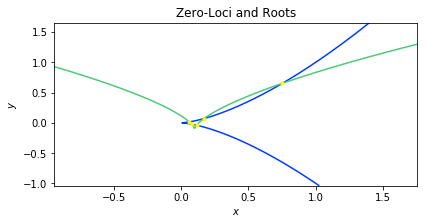

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and yroots solutions:
[4.94309783e-13 1.37886859e-12 1.24787493e-12 1.69027500e-13
 1.02357505e-15]


In [6]:
#03
f = lambda x,y: y**2-x**3
g = lambda x,y: (y+.1)**3-(x-.1)**2

r1 = np.loadtxt('chebfun_test_output/cftest1_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [  0.   0. 100.   0.]


<Figure size 7200x4800 with 0 Axes>

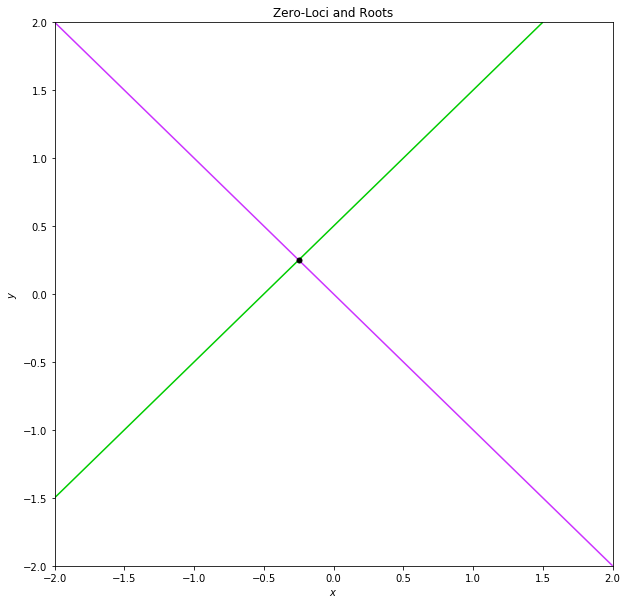

Number of roots: 1
Number found by yroots: 1
Distance between chebfun solutions and yroots solutions:
[2.95045816e-16]


In [68]:
#04
f = lambda x,y: x - y + .5
g = lambda x,y: x + y

r1 = np.loadtxt('chebfun_test_output/cftest1_4.csv',delimiter=',')

#only one root
a = np.array([-1,-1])
b = np.array([1,1])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',1)
print('Number found by yroots:',r2.shape[0])
print('Distance between chebfun solutions and yroots solutions:')
print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [  0.   0. 100.   0.]


<Figure size 7200x4800 with 0 Axes>

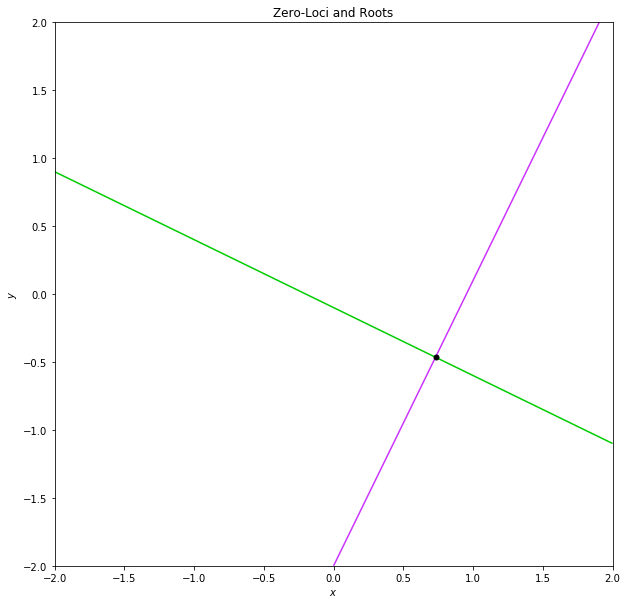

Number of roots: 1
Number found by yroots: 1
Distance between chebfun solutions and yroots solutions:
7.021666937153402e-16


In [80]:
#05
### THIS ONE FAILS
f = lambda x,y: y + x/2 + 1/10
g = lambda x,y: y - 2.1*x + 2

r1 = np.loadtxt('chebfun_test_output/cftest1_5.csv',delimiter=',')

#only one root
a = np.array([-1,-1])
b = np.array([1,1])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',1)
print('Number found by yroots:',r2.shape[0])
print('Distance between chebfun solutions and yroots solutions:')
print(np.linalg.norm(r1-r2[0]))

# `test_roots02`

Percent Finished: 100%         
Total intervals checked was 301
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [34.55 54.49  0.   10.96]


<Figure size 7200x4800 with 0 Axes>

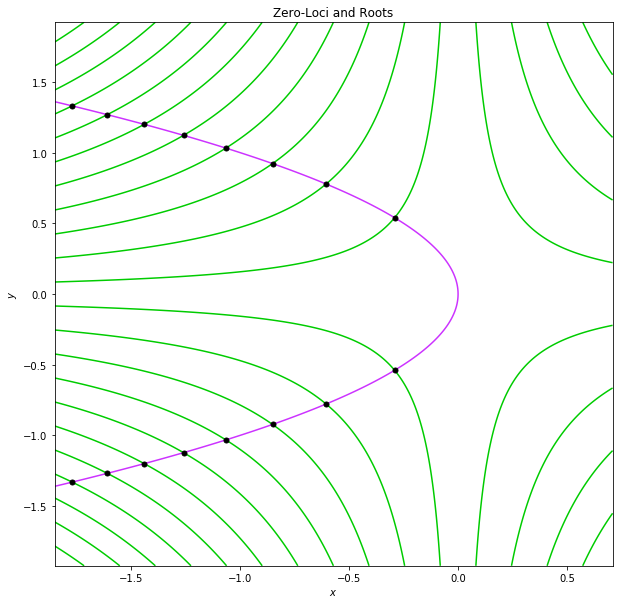

Number of roots: 6
Number found by yroots: 6
Distance between chebfun solutions and yroots solutions:
[9.97936139e-07 8.38877490e-07 4.69393756e-06 5.01375678e-07
 1.11641956e-06 4.73345064e-06]


In [82]:
#01
f = lambda x,y: np.cos(10*x*y)
g = lambda x,y: x + y**2

r1 = np.loadtxt('chebfun_test_output/cftest2_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

Percent Finished: 100%       
Total intervals checked was 451
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 0.89 86.7  12.42  0.  ]


<Figure size 7200x4800 with 0 Axes>

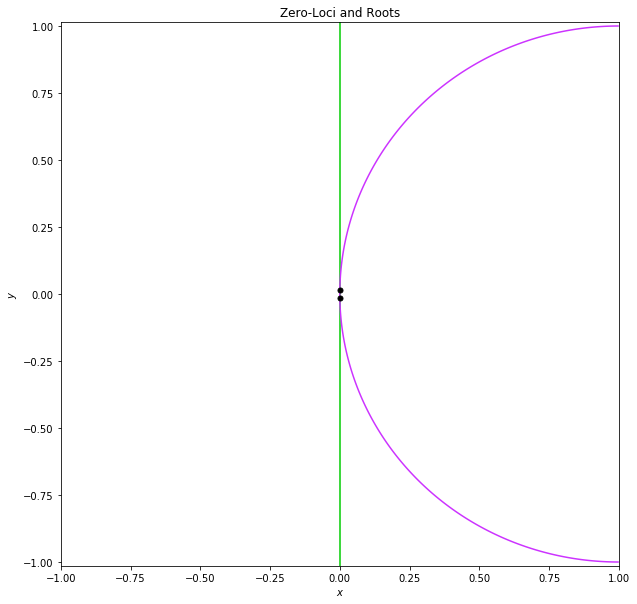

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and yroots solutions:
[9.27946052e-06 1.06632075e-05]


In [83]:
#02
f = lambda x,y: x
g = lambda x,y: (x-.9999)**2 + y**2-1

r1 = np.loadtxt('chebfun_test_output/cftest2_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

Percent Finished: 100%        
Total intervals checked was 358
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 5.03 88.27  2.79  3.91]


<Figure size 7200x4800 with 0 Axes>

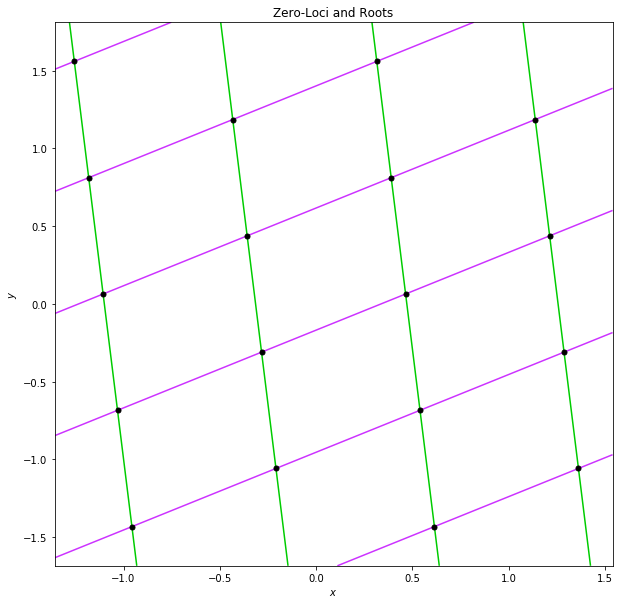

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and yroots solutions:
[3.38055238e-06 2.94899338e-06 6.20174661e-06 5.84198309e-06
 4.88464947e-06]


In [84]:
#03
f = lambda x,y: np.sin(4*(x + y/10 + np.pi/10))
g = lambda x,y: np.cos(2*(x-2*y+ np.pi/7))

r1 = np.loadtxt('chebfun_test_output/cftest2_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

# `test_roots03`

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [  0.   0.   0. 100.]


<Figure size 7200x4800 with 0 Axes>

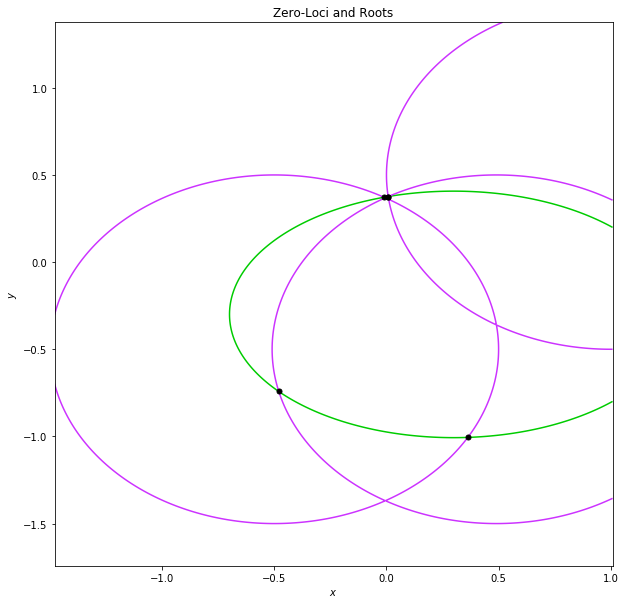

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[5.81146346e-15 7.98355379e-12 2.29399516e-10 2.19682852e-10]


In [85]:
#01
f = lambda x,y: ((x-.3)**2+2*(y+0.3)**2-1)
g = lambda x,y: ((x-.49)**2+(y+.5)**2-1)*((x+0.5)**2+(y+0.5)**2-1)*((x-1)**2+(y-0.5)**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest3_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

Percent Finished: 100%         
Total intervals checked was 3451
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 7.42 86.55  1.74  4.29]


<Figure size 7200x4800 with 0 Axes>

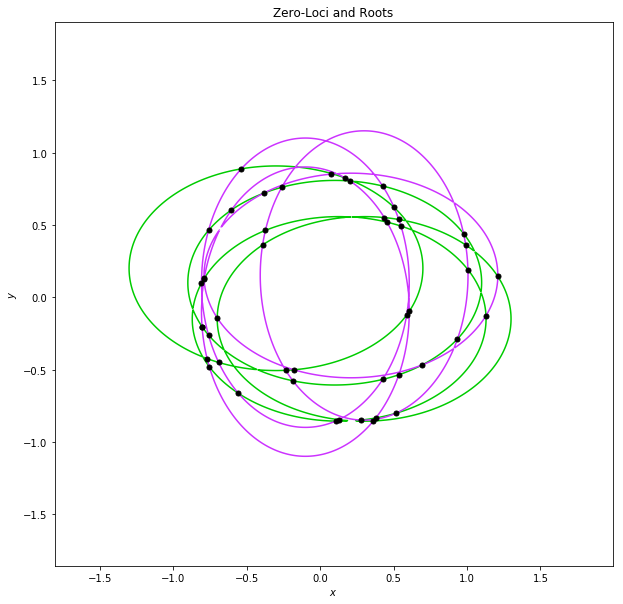

Number of roots: 45
Number found by yroots: 44
chebfun solutions:
[[-0.8071032  -0.85689234]
 [-0.8033223  -0.85569772]
 [-0.78951302 -0.84945686]
 [-0.78810835 -0.846573  ]
 [-0.76882226 -0.83471014]
 [-0.75921296 -0.80249954]
 [-0.75921296 -0.66475709]
 [-0.75383711 -0.57779618]
 [-0.69995434 -0.56850672]
 [-0.69003591 -0.53626692]
 [-0.60293358 -0.50556337]
 [-0.55560212 -0.50179916]
 [-0.53615562 -0.48078087]
 [-0.39118548 -0.46853911]
 [-0.384581   -0.45110368]
 [-0.37190389 -0.42458213]
 [-0.26056059 -0.28857882]
 [-0.23396473 -0.26176863]
 [-0.18492923 -0.2033223 ]
 [-0.17770572 -0.14324315]
 [-0.16704179 -0.12348381]
 [-0.14204839 -0.09762469]
 [ 0.08770572  0.09681733]
 [ 0.10537411  0.12793507]
 [ 0.12803459  0.13024726]
 [ 0.17043254  0.36101009]
 [ 0.2033223   0.36101009]
 [ 0.2766977   0.44016454]
 [ 0.36309878  0.4615932 ]
 [ 0.37968793  0.46176863]
 [ 0.42587963  0.49149877]
 [ 0.42587963  0.51857707]
 [ 0.43709424  0.53713873]
 [ 0.45559086  0.55043029]
 [ 0.50363581  0

In [93]:
#02
f = lambda x,y: ((x-0.1)**2+2*(y-0.1)**2-1)*((x+0.3)**2+2*(y-0.2)**2-1)*((x-0.3)**2+2*(y+0.15)**2-1)*((x-0.13)**2+2*(y+0.15)**2-1)
g = lambda x,y: (2*(x+0.1)**2+(y+0.1)**2-1)*(2*(x+0.1)**2+(y-0.1)**2-1)*(2*(x-0.3)**2+(y-0.15)**2-1)*((x-0.21)**2+2*(y-0.15)**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest3_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots04`

Percent Finished: 100%         
Total intervals checked was 760
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 3.29 93.16  3.55  0.  ]


<Figure size 7200x4800 with 0 Axes>

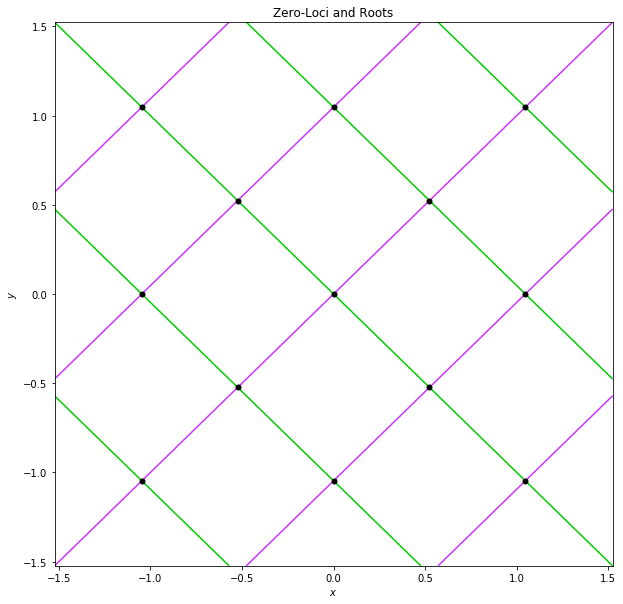

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and yroots solutions:
[1.13285966e-08 1.21838261e-08 4.56164786e-08 1.14436382e-08
 4.44236873e-09]


In [97]:
#01
f = lambda x,y: np.sin(3*(x+y))
g = lambda x,y: np.sin(3*(x-y))

r1 = np.loadtxt('chebfun_test_output/cftest4_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%         
Total intervals checked was 706
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 0.   70.11 29.89  0.  ]


<Figure size 7200x4800 with 0 Axes>

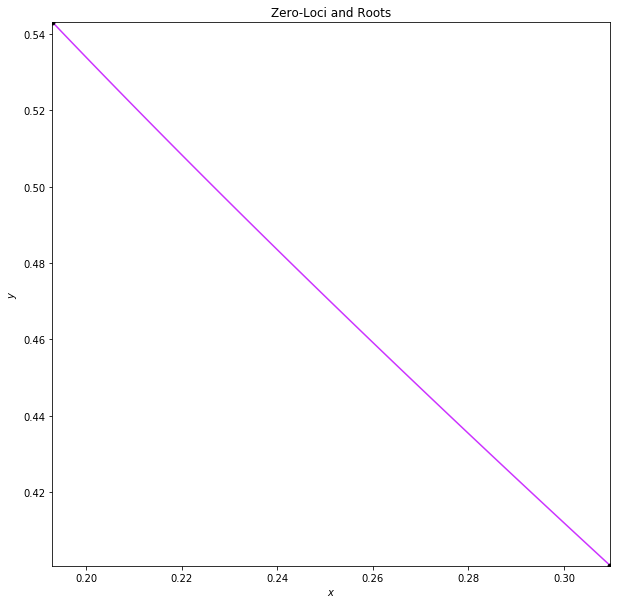

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and yroots solutions:
[5.50136794e-13 1.64093188e-13]


In [99]:
#02
f = lambda x,y: ((90000*y**10 + (-1440000)*y**9 + (360000*x**4 + 720000*x**3 + 504400*x**2 + 144400*x + 9971200)*(y**8) + 
                ((-4680000)*x**4 + (-9360000)*x**3 + (-6412800)*x**2 + (-1732800)*x + (-39554400))*(y**7) + (540000*x**8 + 
                2160000*x**7 + 3817600*x**6 + 3892800*x**5 + 27577600*x**4 + 51187200*x**3 + 34257600*x**2 + 8952800*x + 100084400)*(y**6) + 
                ((-5400000)*x**8 + (-21600000)*x**7 + (-37598400)*x**6 + (-37195200)*x**5 + (-95198400)*x**4 + 
                (-153604800)*x**3 + (-100484000)*x**2 + (-26280800)*x + (-169378400))*(y**5) + (360000*x**12 + 2160000*x**11 + 
                6266400*x**10 + 11532000*x**9 + 34831200*x**8 + 93892800*x**7 + 148644800*x**6 + 141984000*x**5 + 206976800*x**4 + 
                275671200*x**3 + 176534800*x**2 + 48374000*x + 194042000)*(y**4) + ((-2520000)*x**12 + (-15120000)*x**11 + (-42998400)*x**10 + 
                (-76392000)*x**9 + (-128887200)*x**8 + (-223516800)*x**7 + (-300675200)*x**6 + (-274243200)*x**5 + (-284547200)*x**4 + 
                (-303168000)*x**3 + (-190283200)*x**2 + (-57471200)*x + (-147677600))*(y**3) + (90000*x**16 + 720000*x**15 + 3097600*x**14 + 
                9083200*x**13 + 23934400*x**12 + 58284800*x**11 + 117148800*x**10 + 182149600*x**9 + 241101600*x**8 + 295968000*x**7 + 
                320782400*x**6 + 276224000*x**5 + 236601600*x**4 + 200510400*x**3 + 123359200*x**2 + 43175600*x + 70248800)*(y**2) + 
                ((-360000)*x**16 + (-2880000)*x**15 + (-11812800)*x**14 + (-32289600)*x**13 + (-66043200)*x**12 + (-107534400)*x**11 + 
                (-148807200)*x**10 + (-184672800)*x**9 + (-205771200)*x**8 + (-196425600)*x**7 + (-166587200)*x**6 + (-135043200)*x**5 + 
                (-107568800)*x**4 + (-73394400)*x**3 + (-44061600)*x**2 + (-18772000)*x + (-17896000))*y + (144400*x**18 + 1299600*x**17 + 
                5269600*x**16 + 12699200*x**15 + 21632000*x**14 + 32289600*x**13 + 48149600*x**12 + 63997600*x**11 + 67834400*x**10 + 
                61884000*x**9 + 55708800*x**8 + 45478400*x**7 + 32775200*x**6 + 26766400*x**5 + 21309200*x**4 + 11185200*x**3 + 6242400*x**2 + 
                3465600*x + 1708800)))
g = lambda x,y: 1e-4*(y**7 + (-3)*y**6 + (2*x**2 + (-1)*x + 2)*y**5 + (x**3 + (-6)*x**2 + x + 2)*y**4 + (x**4 + (-2)*x**3 + 2*x**2 + 
                x + (-3))*y**3 + (2*x**5 + (-3)*x**4 + x**3 + 10*x**2 + (-1)*x + 1)*y**2 + ((-1)*x**5 + 3*x**4 + 4*x**3 + (-12)*x**2)*y + 
                (x**7 + (-3)*x**5 + (-1)*x**4 + (-4)*x**3 + 4*x**2))

r1 = np.loadtxt('chebfun_test_output/cftest4_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1e-5,b+1e-5,plot=True)
r2 = rootfilter(r2,a,b,1e-5)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots05`

Percent Finished: 100%         
Total intervals checked was 2947
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 5.02 89.28  1.19  4.51]


<Figure size 7200x4800 with 0 Axes>

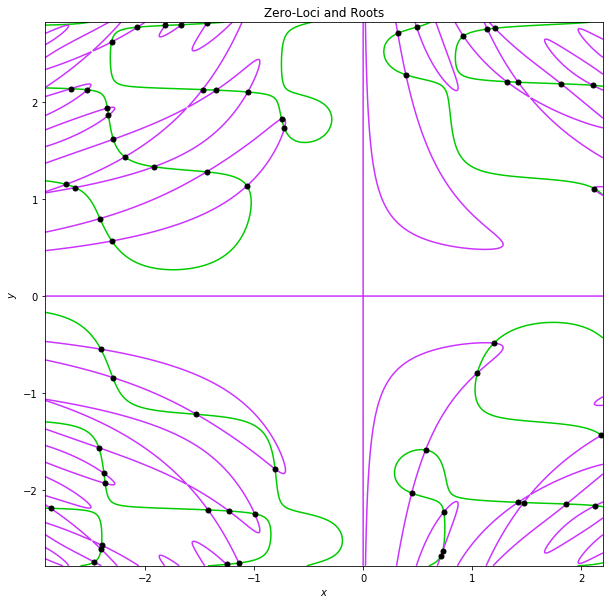

Number of roots: 10
Number found by yroots: 10
Distance between chebfun solutions and yroots solutions:
[1.50658996e-06 3.98259921e-08 1.47698198e-08 2.47602232e-06
 2.31064458e-06 3.29539051e-06 9.88246086e-07 8.49111349e-09
 4.00713275e-06 1.37035718e-06]


In [101]:
#01
f = lambda x,y: 2*x*y*np.cos(y**2)*np.cos(2*x)-np.cos(x*y)
g = lambda x,y: 2*np.sin(x*y**2)*np.sin(3*x*y)-np.sin(x*y)

r1 = np.loadtxt('chebfun_test_output/cftest5_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots06`

Percent Finished: 100%       
Total intervals checked was 145
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 0.   95.17  1.38  3.45]


<Figure size 7200x4800 with 0 Axes>

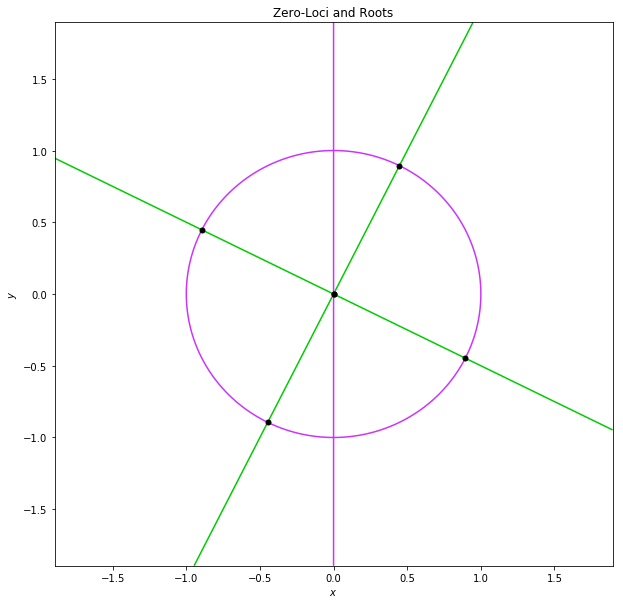

Number of roots: 5
Number found by yroots: 6
chebfun solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [-9.89338159e-18 -1.06428375e-08]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
yroots solutions:
[[-8.94430426e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47215110e-01]
 [ 1.03250741e-14 -1.03250741e-14]
 [ 1.03250741e-14 -1.03250741e-14]
 [ 4.47213637e-01  4.47215213e-01]
 [ 8.94430221e-01  8.94427289e-01]]


In [102]:
#01
f = lambda x,y: (y - 2*x)*(y+0.5*x)
g = lambda x,y: x*(x**2+y**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest6_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%       
Total intervals checked was 4
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [  0.   0.   0. 100.]


<Figure size 7200x4800 with 0 Axes>

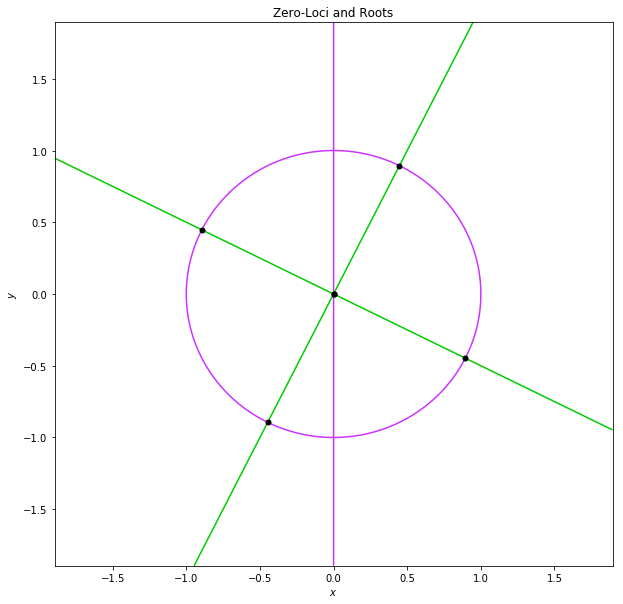

Number of roots: 5
Number found by yroots: 6
chebfun solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [-9.89338159e-18 -1.06428375e-08]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
yroots solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [ 1.00000000e-04 -5.00000293e-05]
 [ 1.00000000e-04  2.00000029e-04]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]


In [103]:
#02
f = lambda x,y: (y - 2*x)*(y+.5*x)
g = lambda x,y: (x-.0001)*(x**2+y**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest6_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%       
Total intervals checked was 4
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 0. 50.  0. 50.]


<Figure size 7200x4800 with 0 Axes>

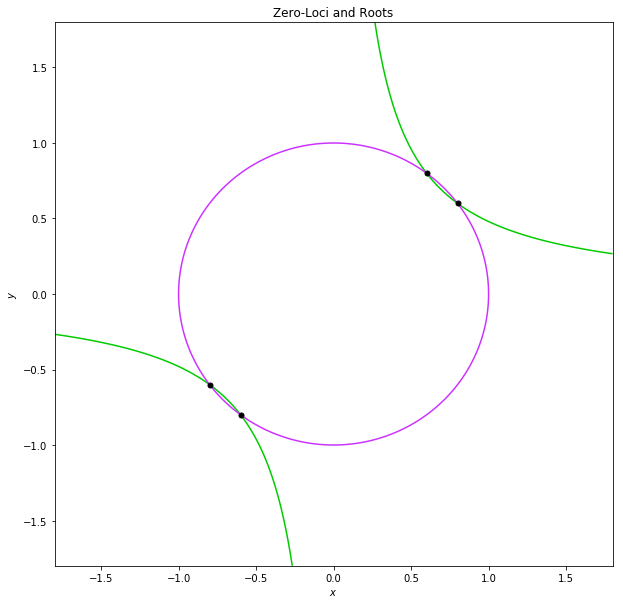

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[4.71027738e-16 4.44089210e-16 7.39445208e-15 7.12102275e-15]


In [104]:
#03
f = lambda x,y: 25*x*y - 12
g = lambda x,y: x**2+y**2-1

r1 = np.loadtxt('chebfun_test_output/cftest6_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots07`

Percent Finished: 100%         
Total intervals checked was 10273
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [2.000e-02 6.689e+01 3.238e+01 7.100e-01]


<Figure size 7200x4800 with 0 Axes>

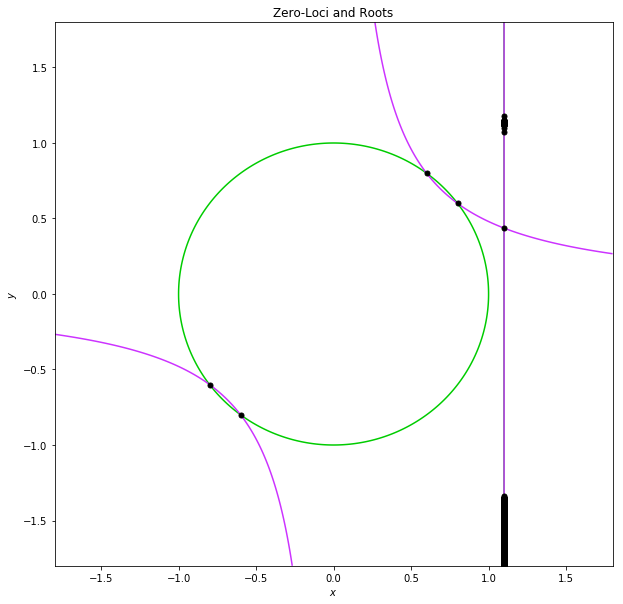

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[1.05476219e-05 7.91072469e-06 3.75660219e-05 5.00848937e-05]


In [105]:
#01
f = lambda x,y: (x**2+y**2-1)*(x-1.1)
g = lambda x,y: (25*x*y-12)*(x-1.1)

r1 = np.loadtxt('chebfun_test_output/cftest7_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%         
Total intervals checked was 490
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [12.04 83.47  1.43  3.06]


<Figure size 7200x4800 with 0 Axes>

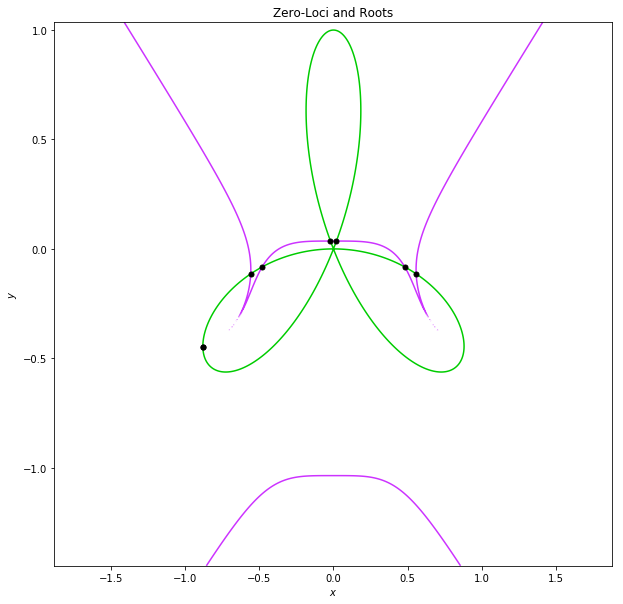

Number of roots: 10
Number found by yroots: 8
chebfun solutions:
[[-0.88004961 -0.44790238]
 [-0.88004959 -0.44790238]
 [-0.55758604 -0.44790153]
 [-0.48051571 -0.44790152]
 [-0.02006818 -0.1140845 ]
 [ 0.02006818 -0.1140845 ]
 [ 0.48051571 -0.0823602 ]
 [ 0.55758604 -0.0823602 ]
 [ 0.88004959  0.03588643]
 [ 0.88004961  0.03588643]]
yroots solutions:
[[-0.88002826 -0.44794541]
 [-0.88002577 -0.44784795]
 [-0.55758854 -0.11410252]
 [-0.48046834 -0.11405557]
 [-0.02006834 -0.08242395]
 [ 0.02006812 -0.0823044 ]
 [ 0.48057207  0.03588641]
 [ 0.55758181  0.03588641]]


In [106]:
#02
f = lambda x,y: y**4 + (-1)*y**3 + (2*x**2)*(y**2) + (3*x**2)*y + (x**4)
h = lambda x,y: y**10-2*(x**8)*(y**2)+4*(x**4)*y-2
g = lambda x,y: h(2*x,2*(y+.5))

r1 = np.loadtxt('chebfun_test_output/cftest7_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

In [108]:
#03
a = 1e-09
f = lambda x,y: np.cos(x*y/(a**2))+np.sin(3*x*y/(a**2))
g = lambda x,y: np.cos(y/a)-np.cos(2*x*y/(a**2))

r1 = np.loadtxt('chebfun_test_output/cftest7_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

ValueError: operands could not be broadcast together with shapes (100,) (2,) 

# `test_roots08`

Percent Finished: 100%         
Total intervals checked was 2041
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 3.04 91.72  3.23  2.01]


<Figure size 7200x4800 with 0 Axes>

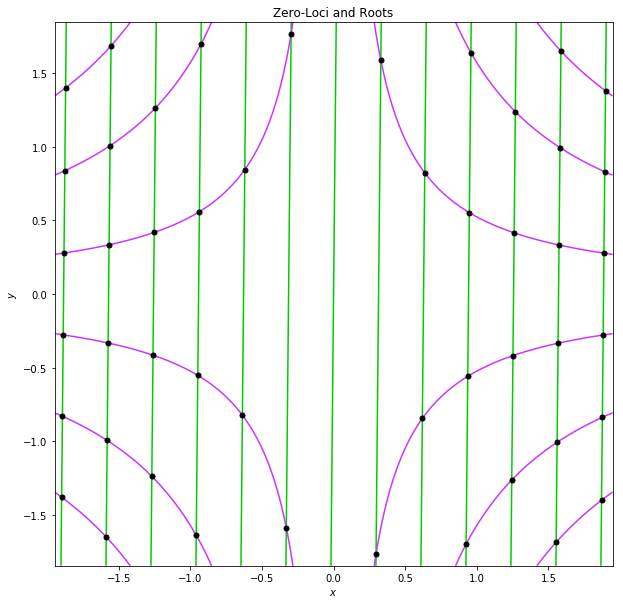

Number of roots: 8
Number found by yroots: 8
Distance between chebfun solutions and yroots solutions:
[4.96535245e-07 1.36508126e-06 1.00980453e-07 4.85355380e-06
 4.99791813e-07 1.50798073e-07 7.58093231e-07 8.53370622e-07]


In [109]:
#01
f = lambda x,y: np.sin(10*x-y/10)
g = lambda x,y: np.cos(3*x*y)

r1 = np.loadtxt('chebfun_test_output/cftest8_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%         
Total intervals checked was 655
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 7.94 84.58  0.15  7.33]


<Figure size 7200x4800 with 0 Axes>

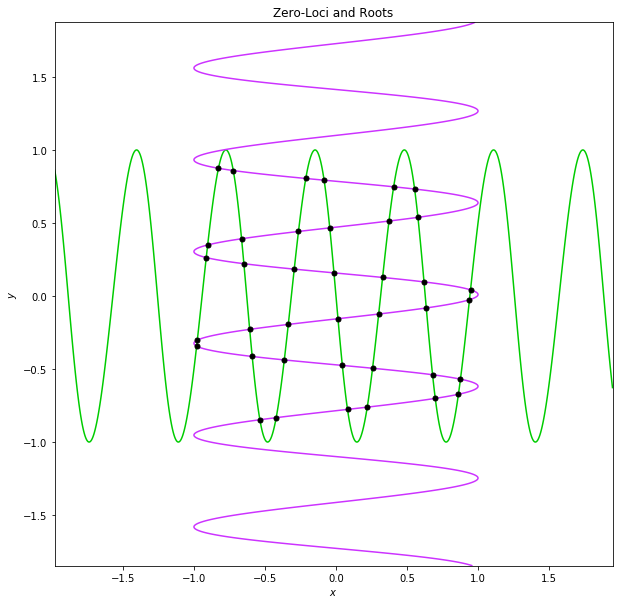

Number of roots: 39
Number found by yroots: 39
Distance between chebfun solutions and yroots solutions:
[1.57580135e-06 2.75881335e-06 1.13069328e-06 1.67409636e-06
 1.12811936e-05 1.50484793e-05 6.30005542e-06 4.73626765e-06
 1.62179727e-06 1.92079374e-06 3.71940858e-06 2.25425920e-06
 6.58699798e-06 9.81693794e-06 6.87655682e-07 1.24294042e-06
 9.29047852e-06 1.00444967e-05 2.15492775e-06 1.78239783e-06
 6.33150985e-06 6.41657791e-06 3.95158604e-06 4.32698820e-06
 1.14366715e-06 9.82181536e-07 8.56541759e-06 4.89309463e-06
 6.39339347e-06 4.40393781e-06 3.43978390e-06 1.03357245e-07
 1.63063293e-06 5.63400096e-07 1.69928141e-06 1.55273284e-06
 1.26923968e-06 2.58440984e-06 5.89530257e-07]


In [110]:
#02
f = lambda x,y: np.sin(10*x-y/10) + y
g = lambda x,y: np.cos(10*y-x/10) - x

r1 = np.loadtxt('chebfun_test_output/cftest8_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots09`

Percent Finished: 100%       
Total intervals checked was 19
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 0.   57.89  0.   42.11]


<Figure size 7200x4800 with 0 Axes>

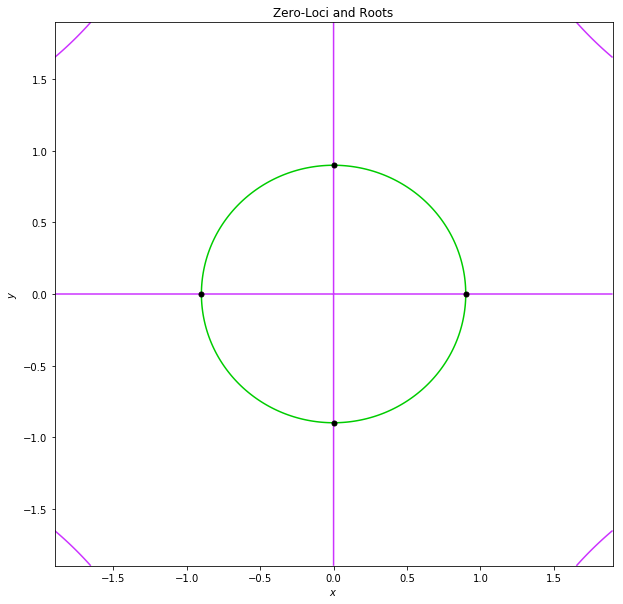

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[7.29239918e-14 3.04450120e-06 4.70976564e-07 3.66206604e-12]


In [111]:
#01
f = lambda x,y: x**2+y**2-.9**2
g = lambda x,y: np.sin(x*y)

r1 = np.loadtxt('chebfun_test_output/cftest9_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [  0.   0.   0. 100.]


<Figure size 7200x4800 with 0 Axes>

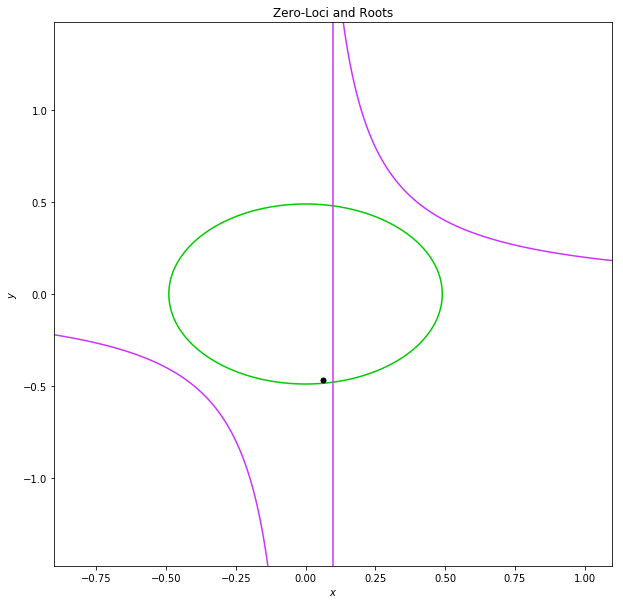

Number of roots: 2
Number found by yroots: 0
chebfun solutions:
[[ 0.1       -0.4796874]
 [ 0.1        0.4796874]]
yroots solutions:
[]


In [112]:
#02
f = lambda x,y: x**2+y**2-.49**2
g = lambda x,y: (x-.1)*(x*y-.2)

r1 = np.loadtxt('chebfun_test_output/cftest9_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots10`

Percent Finished: 100%         
Total intervals checked was 1126
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [14.65 81.44  1.87  2.04]


<Figure size 7200x4800 with 0 Axes>

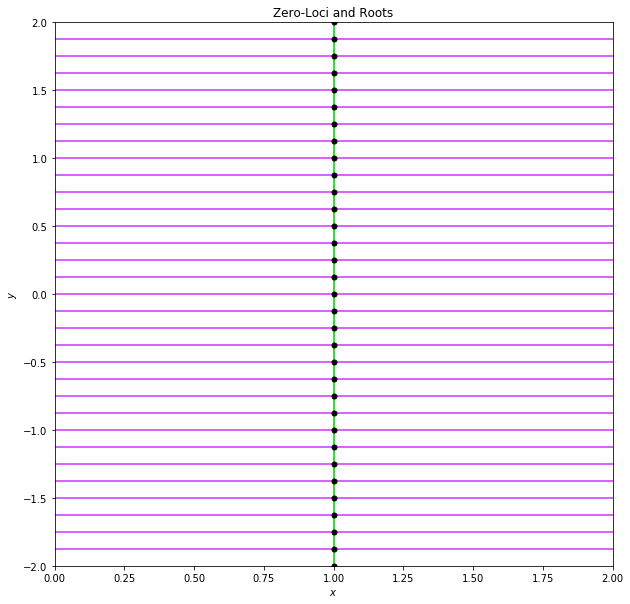

Number of roots: 17
Number found by yroots: 17
Distance between chebfun solutions and yroots solutions:
[7.36924420e-07 8.32519252e-08 1.74908552e-09 4.84577563e-09
 4.22505531e-09 5.71841378e-09 3.85623869e-09 2.00095446e-09
 7.71132626e-10 3.89567834e-09 2.80241857e-09 6.17089455e-09
 2.21498948e-09 6.51933806e-09 7.19513607e-10 7.71879310e-07
 2.94237141e-09]


In [113]:
#01
f = lambda x,y: (x-1)*(np.cos(x*y**2)+2)
g = lambda x,y: np.sin(8*np.pi*y)*(np.cos(x*y)+2)

r1 = np.loadtxt('chebfun_test_output/cftest10_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

In [4]:
from yroots.polynomial import getPoly

In [ ]:
np.random.seed(1)
a = -2*np.ones(2);b = 2*np.ones(2)
A = getPoly(20,2,True)
B = getPoly(28,2,True)
yr.subdivision.solve([A,B],a,b,plot=True,plot_intervals=True)

Percent Finished: 100%         
Total intervals checked was 115177
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [3.45538e+01 9.22100e-01 0.00000e+00 1.82000e-02 6.45059e+01]


In [15]:
np.random.seed(1)
a = -np.ones(2);b = np.ones(2)
A = getPoly(20,2,True)
B = getPoly(28,2,True)
yr.subdivision.solve([A,B],a,b,plot=True,plot_intervals=True)

TypeError: solve() got an unexpected keyword argument 'approx_tol'

In [11]:
B(roots)

array([-1.00943702e-08, -1.64465672e-08])

In [13]:
roots

array([[ 0.57957197,  0.95268148],
       [-0.97342422, -0.75551954]])